In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df= pd.read_excel('real_estate.xlsx')

In [3]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


In [4]:
df1= df.drop(columns=['X2 house age'])
df1

,No,X1 transaction date,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
409,410,2013.000000,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.666667,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250000,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000000,104.81010,5,24.96674,121.54067,52.5


In [5]:
df.isnull().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

In [6]:
x= df['X2 house age']
y= df['Y house price of unit area']

In [7]:
X_Train, x_test, Y_Train, y_test= train_test_split(x, y, test_size= 0.2)

In [8]:
Y_Train

114    53.3
277    27.7
269    23.0
297    28.5
138    43.5
       ... 
109    28.4
412    52.5
403    39.7
97     34.6
285    55.3
Name: Y house price of unit area, Length: 331, dtype: float64

In [9]:
lin_reg_model= LinearRegression(n_jobs= -1)
lin_reg_model.fit(np.array(X_Train).reshape(-1, 1), np.array(Y_Train).reshape(-1, 1))

LinearRegression(n_jobs=-1)

In [10]:
print("Intercept: ", lin_reg_model.intercept_[0])
print("Slope: ", lin_reg_model.coef_[0][0])

Intercept:  43.15251387351431
Slope:  -0.277083053637891


In [11]:
print("The equation is as follows: Y= House Age*", lin_reg_model.coef_[0][0], " + ",lin_reg_model.intercept_[0])

The equation is as follows: Y= House Age* -0.277083053637891  +  43.15251387351431


In [12]:
predictions_test= lin_reg_model.predict(np.array(x_test).reshape(-1, 1))

In [13]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [14]:
print("mean sq error: ", mean_squared_error(predictions_test, y_test))
print("r2_score: ", r2_score(predictions_test, y_test))

mean sq error:  171.85824290228499
r2_score:  -14.297029333019717


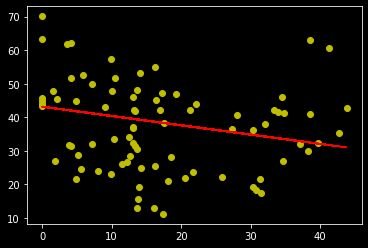

In [15]:
plt.style.use('dark_background')
plt.plot(x_test, y_test, 'yo')
plt.plot(x_test, predictions_test, 'r-')
plt.show();

mean sq error for  X3 distance to the nearest MRT station  column:  154.76257123597014
r2_score for X3 distance to the nearest MRT station  column:  -1.073240294425407 



mean sq error for  X4 number of convenience stores  column:  111.38144945464151
r2_score for X4 number of convenience stores  column:  -1.0902528648954881 



mean sq error for  X5 latitude  column:  90.6581098186556
r2_score for X5 latitude  column:  -0.6514248873157356 



mean sq error for  X6 longitude  column:  57.69874176462219
r2_score for X6 longitude  column:  -0.3132620261781207 





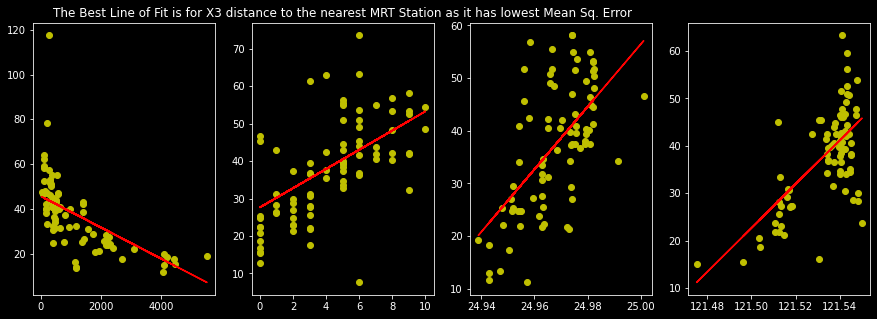

In [16]:
plt.rcParams['figure.figsize']= (15, 5)
fig, axes= plt.subplots(1, 4)
ranger= 0
for k in df.columns[3:-1]:
    X1= df[k]
    X_Train, x_test, Y_Train, y_test= train_test_split(X1, y, test_size= 0.2)
    lin_reg_model= LinearRegression(n_jobs= -1)
    lin_reg_model.fit(np.array(X_Train).reshape(-1, 1), np.array(Y_Train).reshape(-1, 1))
    predictions_test= lin_reg_model.predict(np.array(x_test).reshape(-1, 1))
    axes[ranger].plot(x_test, y_test, 'yo')
    axes[ranger].plot(x_test, predictions_test, 'r-')
    ranger+=1
    print("mean sq error for ",k," column: ", mean_squared_error(predictions_test, y_test))
    print("r2_score for", k ," column: ", r2_score(predictions_test, y_test), '\n\n\n')

axes[1].set_title("The Best Line of Fit is for X3 distance to the nearest MRT Station as it has lowest Mean Sq. Error")
plt.show();